# SCOPES, CLOSURES AND DECORATORS

Nadále budu částečně zkracovat teoretickou část, abych celý proces urychlil je to nezbytné. Trochu více potrápit mozek a psaní ale zároveň ušetřit čas. Usoudím tedy podle teorie jestli je třeba jí zapsat či nikoliv a nebudu je rozdělovat.

## Global and Local Scopes

Scope je pro mě zamotaná část, takže zde teorie bude poctivě.

- a = 10, naše proměnná je vázaná na objekt má id adresu
- nicméně naše a existuje vždy v určité části kodu
- naše reference a propojení proměnných je uložené v namespaces
- každý scope má namespace - něco jako tabulka Co s Čím je jak propojeno

Global scope

- něco jako truly global scope neexistuje, napříč aplikace apod.
- kromě pár vyjímek jako None, True, False, print, dict apod.
- Global scopes jsou umístění uvnitř built-in scope
- Náš built-in scope má v sobě právě print apod..a má svojí namespace
- Ale poté má například jiný scope se svojí tabulkou - má svojí tabulku
- A pokud například v naše scopu nenajde vazbu na a - přejde na built-in scope
- print(True) --> proběhně správně nic nenajde ale v built-in scope najde obojí
- print(a) --> nastane chyba protože a nemáme určené

Ale tohle je pěkné :)

- print = lambda x: f"{hello}"
- s = print("world")
- jde o to že zde najde v global scope náš print a nepoužije tak print z built-in scope (tzn klasický print)

Local Scope

- jedná se o scope v našich funkcích
- důležité je, že naše neznáme uvnitř funkce nejsou vytvořeny dokud není funkce zavolaná
- kdykoliv je funkce zavolaná - je zavolán nový scope - nový binding
- protože se mohou měnit hodnoty
- A PŘESNĚ PROTO FUNGUJE REKURZE :) - protože když se zavolá faktoriál znovu jedeme pořád na nový scope
- tzn na nové hodnoty ...fuck yeah
- compilate a running time - při tvorbě funkce python odhadne scope ale vytvoří jej až při spuštění a po konci jej zase smaže

Nested Scopes

- jdeme vždycky od spoda ze shora - local scope - module scope  built-in scope
- důležité je že local scope se nazvájem nemohou prohledávat
- dále máme funkce ve funkcích apod..--> takže se nám to trochu nestí :)
- naše funkce mohou využívat hodnoty napříč všemi scopy samozřejmě
- viz příklad print(True), print(a) ..
- JAKMILE FUNKCE DOJEDE - všechny reference a binding se vyčistí

Modifikace global variables z local scope

- pokud mám napříkla a v global scope a poté ve funkci tak se takzvaně maskují
- mají odlišné adresy, najde ve funkci a vyčistí, takže naše a se nezmění
- máme proto ale global keyword - čímž jej přesuneme právě na global scope

Global and Local Scoping

- při napsání funkce začíná compilace, Python projede všechny neznámé a projede, které jsou přiřazené tzn. x = 10 apod..a přiřadí je jako local - pokud nemají přesně specifikováno, že budou global
- pokud k ním není přiřazena hodnota - označí se jako non local nic víc a až při spuštění řeší co hodnota je
- JE NUTNÉ ROZLIŠIT mezi a, a=10, global a -> a = 100, TŘI ROZDÍLNÉ PŘÍPADY

In [8]:
a = 10

In [9]:
def my_func(n):
    c = n **2
    return c
#c je local, n je též local 

In [11]:
def my_func(n):
    print(f"global a:{a}")
    #n je local a a je v tomto případě global
    c = a ** n
    return c

In [13]:
my_func(2) #vše funguje jak má - bere si jak global a, tak local n

global a:10


100

In [14]:
def my_func(n):
    a = 20
    c = a ** n
    return c

In [16]:
my_func(2)

400

In [17]:
print(a) #jasné naše a je pouze local a na globální a nemá žádný vliv

10


In [18]:
def my_func(n):
    global a
    a = 20
    c = a ** n
    return c

In [20]:
print(a) #jelikož jsem ještě nespustil nepřepsal jsem a

10


In [21]:
my_func(2)

400

In [23]:
print(a) #Ale nyní jsme již přepsali naše a v global :)

20


In [24]:
def my_func():
    global var
    var = "hello world"
    return

In [26]:
print(var) #hodnota neexistuje nemám jí nikde v global scope

NameError: name 'var' is not defined

In [27]:
my_func()

In [29]:
print(var) #ALE NYNÍ HDONOTA EXISTUJE

hello world


V podstatě mohu ve funkci vytvářet nové global hodnoty do global scopu ikdyž zde ještě nejsou.

In [30]:
a = 10

In [31]:
def my_func():
    print(f"global a: {a}")
    a = "hello world"
    print(a)
#tahle funkce hodí eror - protože v compilace si myslí
#že definuji tisknu a až po definování - nedostane se do fáze kde by python mohl najít v global jiné a..

In [32]:
f = lambda n: print(a**n)

In [33]:
f(2)

100


In [39]:
def print(x):
    return f"hello {x}"

In [40]:
print("world")

'hello world'

Nyní jsme narušili print funkci :D. Už jí nepoužijeme, protože najdeme hned odpověď v global scopu a nedostaneme se do built-in scopu.

In [41]:
del print #odmažeme jí ať nám nedělá bordel

## Nonlocal Scopes

- v podstatě pokud mám funkci ve funkci => problém je že někdy jde z inner funkce do outer funkce a jde dále do global scope ale někdy také ne :)
- global funguje stále stejně i pokud je v inner funkci o úroveň dále
- a to důležité můžeme měnit hodnoty v rámci outer-inner funkce? Když se "maskuje" hodnota v outer a inned funkci
- použití nonlocal v inner funkci - čímž dáme pythonu vědět že má přepsat i ve funkci o úroveň výše, nepřechází do global, může zde tedy být více funkcí v sobě a jde od nonlocal příkazu nahoru ale celek funkce je strop
- Pokud ale máme například X o 3x hodnotách a začnu měnit od zadu - změním jen tu druhou a k té první se už nedostane
- musel bych k 3t a 2hé dopsat nonlocal a poté dojdeme až k první - v podstatě to vše funguje jako chain

In [42]:
def outer_func():
    x = "hello"
    def inner_func():
        print(x)
    inner_func()
        

In [43]:
outer_func()

hello


In [44]:
def outer_func():
    x = "hello"
    def inner1():
        def inner2():
            print(x)
        inner2()
    inner1()

In [45]:
outer_func()

hello


U těchto nested funkcí je dobré vědět že jak se píší zezačátku tak opačně zpátky :) ..

In [46]:
def outer_func():
    x = "hello"
    def inner():
        x = "python"
        print("inner", x)
    inner()
    print(f"outer {x}")
    

In [47]:
outer_func()

inner python
outer hello


Jasné, oba dva mají své spešl scopy, takže se vůbec nic neděje a obě x mají dvě rozdílné hodnoty.

In [55]:
def outer_func():
    x = "hello"
    def inner():
        nonlocal x
        x = "python"
        print("inner", x)
        #tady máme python protože je definován takto
    print(f"outer(before){x}")
    inner()
    print(f"outer {x}")

In [56]:
outer_func()

outer(before)hello
inner python
outer python


Naše before x - je hello ještě než jsme ho přepsali díky nonlocal.

In [57]:
def outer():
    x = "hello"
    def inner1():
        def inner2():
            nonlocal x
            x = "python"
        inner2()
    inner1()
    print(x)
        

In [58]:
outer()

python


Naše x je hello, ale jelikož se prvně spustil inner2 s nonlocal - přepsal hello - a poté došlo k tisku.

In [59]:
def outer():
    x = "hello"
    def inner1():
        nonlocal x
        x = "python"
        def inner2():
            nonlocal x
            x = "monty"
        inner2()
    inner1()
    print(x)

In [60]:
outer()

monty


Tohle je trochu zajímavé a docela matoucí. Více ke studiu, nejde to jako řetěz ale přeskočí?

In [61]:
def outer():
    global x
    x = "monty"
    
    def inner():
        nonlocal x
        x = "hello"
    print(x)

SyntaxError: no binding for nonlocal 'x' found (<ipython-input-61-3697de12c060>, line 6)

Protože naše nonlocal hello nenajde své x, protože naše monty x je globální takže nemají shodu.

In [62]:
def outer():
    x = "monty"
    
    def inner():
        nonlocal x
        x = "hello"
    inner()
    print(x)

In [63]:
outer()

hello


Takto vše přepíšeme správně.

## Closures

- pokud mám inner funkci a v ní neznámé - python jej nevidí, vidí outer ale inner až poté co je outer spuštěná
- u sdílené proměnné přes dva scopy - tak vytvoří cell se svojí adresou a s adresou na hlavní objekt - hodnotu výslednou (komplikovanější v codu to bude o něco jasnější)
- a částečně to vysvětluje, že se nám nejedná o chain u scopu a jedné hodnoty ale o tom, že nám to směřuje na jeden objekt
- a náš spešl objet tzn. cell který ukazuje na stejnou hodnotu napříč více scopy - tak při ukončení funkce nezaniká a tudíž stále víme jaká je hodnota
- closure je obecně funkce v extended scopu obsahující nonlocal proměnnou 

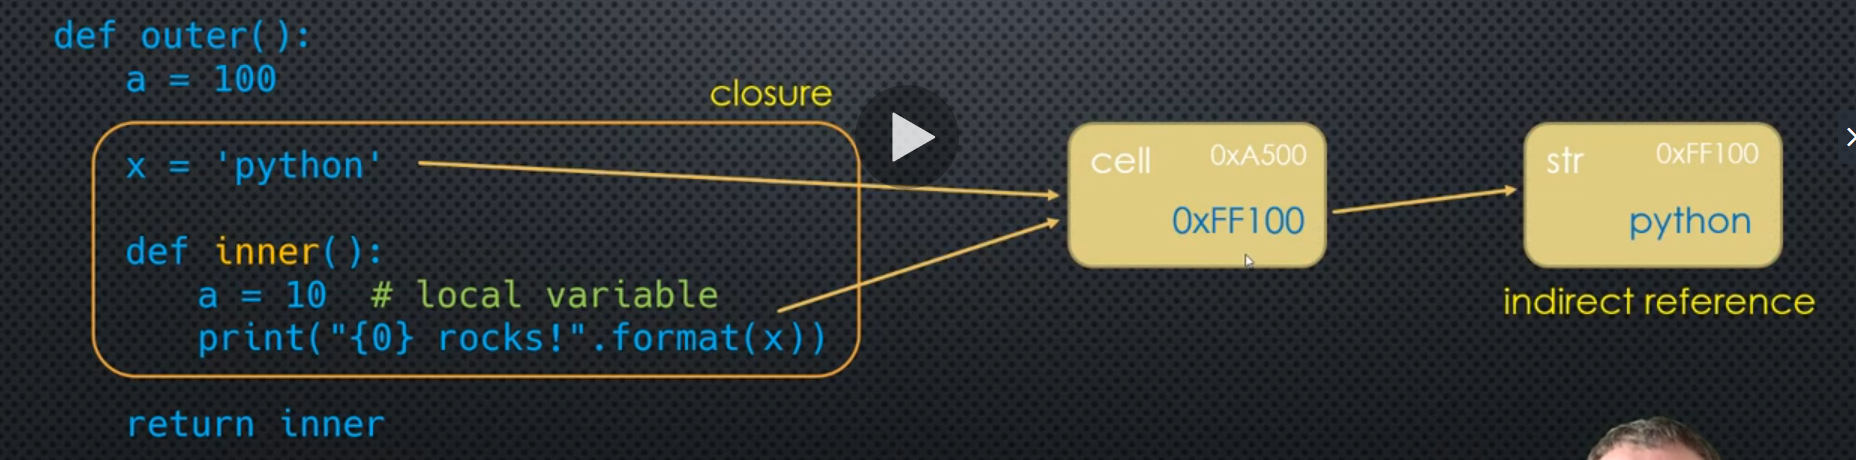

V podstatě poslední věta výše je zde pěkně znázorněná v obrázku.

- .__code__.co_freevars => introspekce zjistíme jaké jso free variables neboli variables u closure
- .__closure__ => odkazuje na cell a na objekt - v pdostatě adresy týkající se free variables

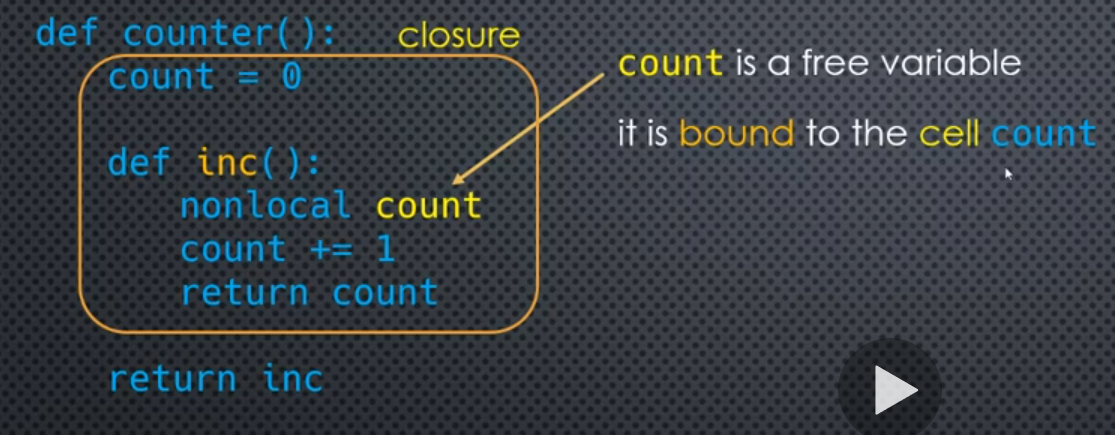

- closure se vytváří vždycky když probíhá znovu funkce

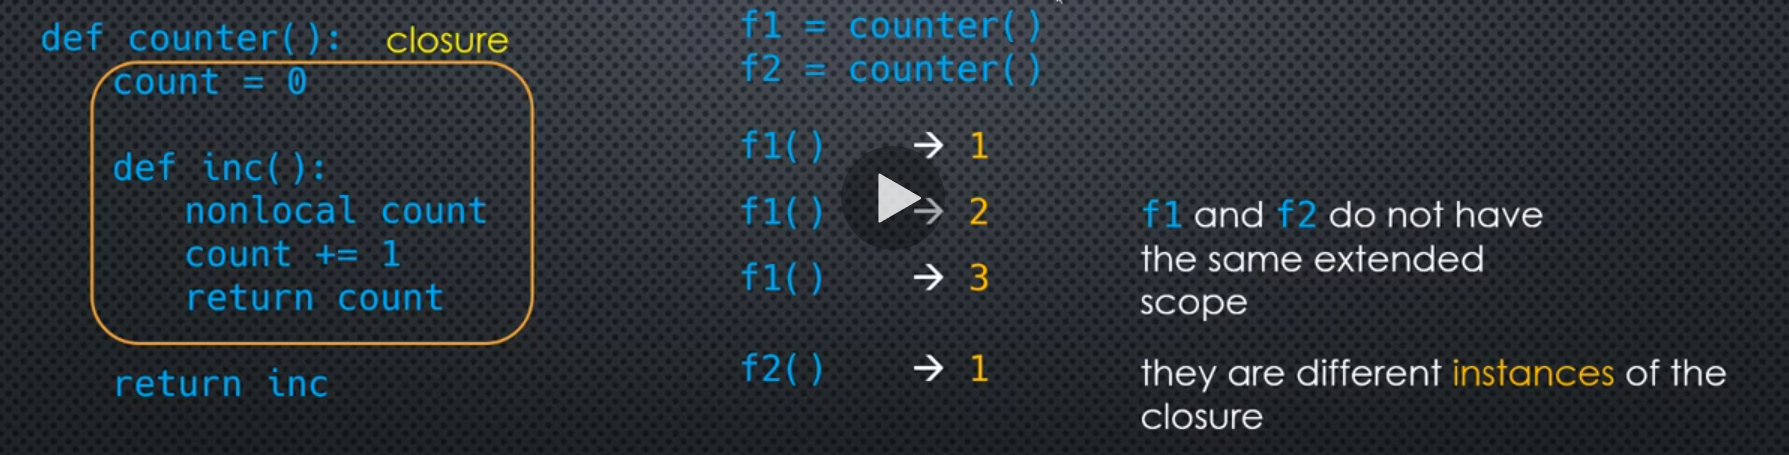

- tak a jak to dopadne pokud máme dvě closure ale s odkazem na stejný count?

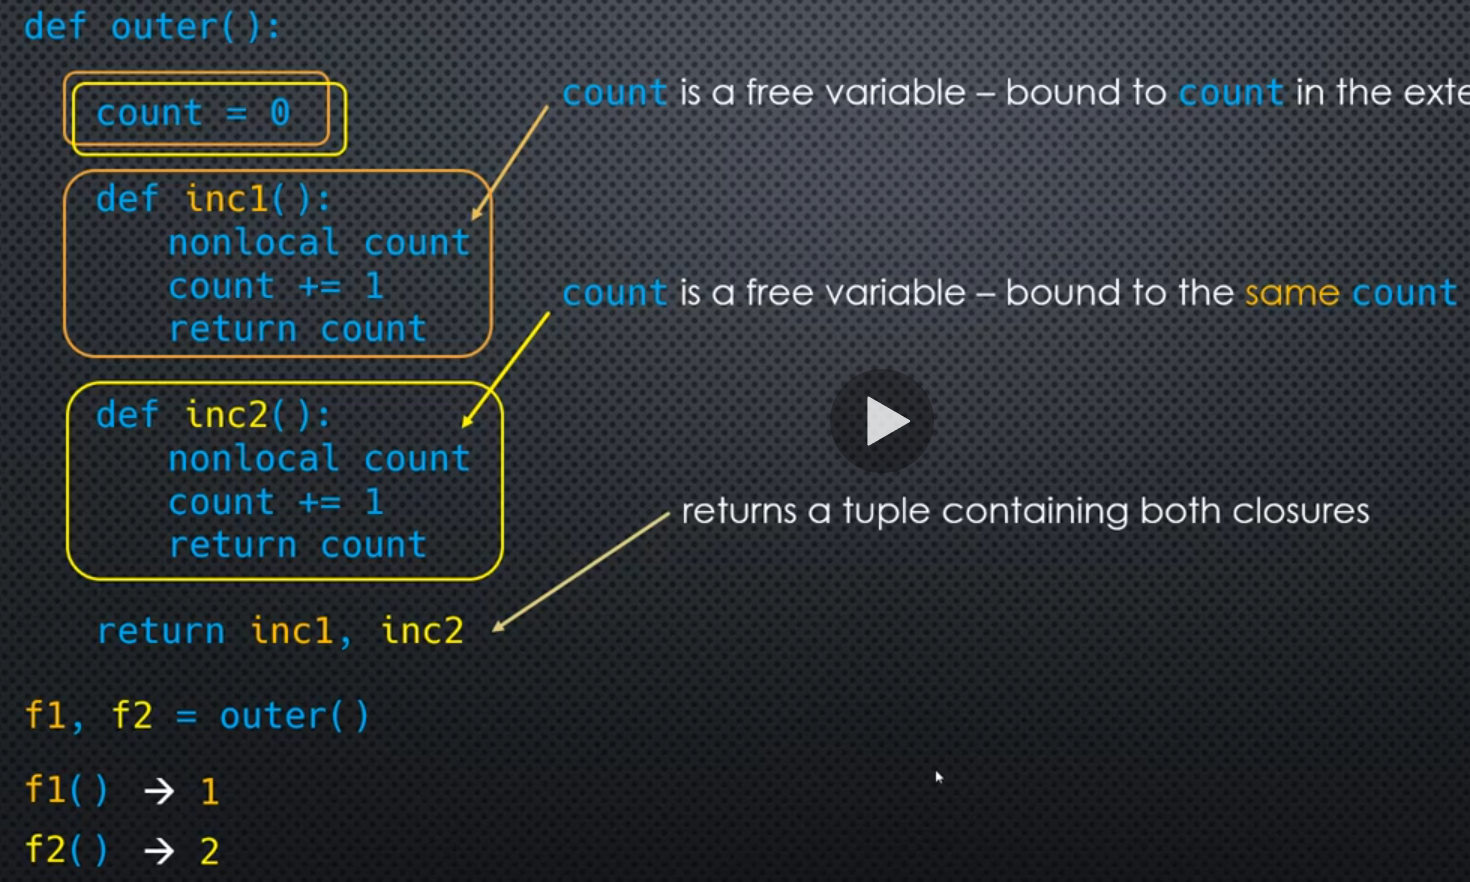

Sdílejí stejný počet, tohle je poměrně zajímavé - obrázek je zde mnohem lepší než psaný výklad.

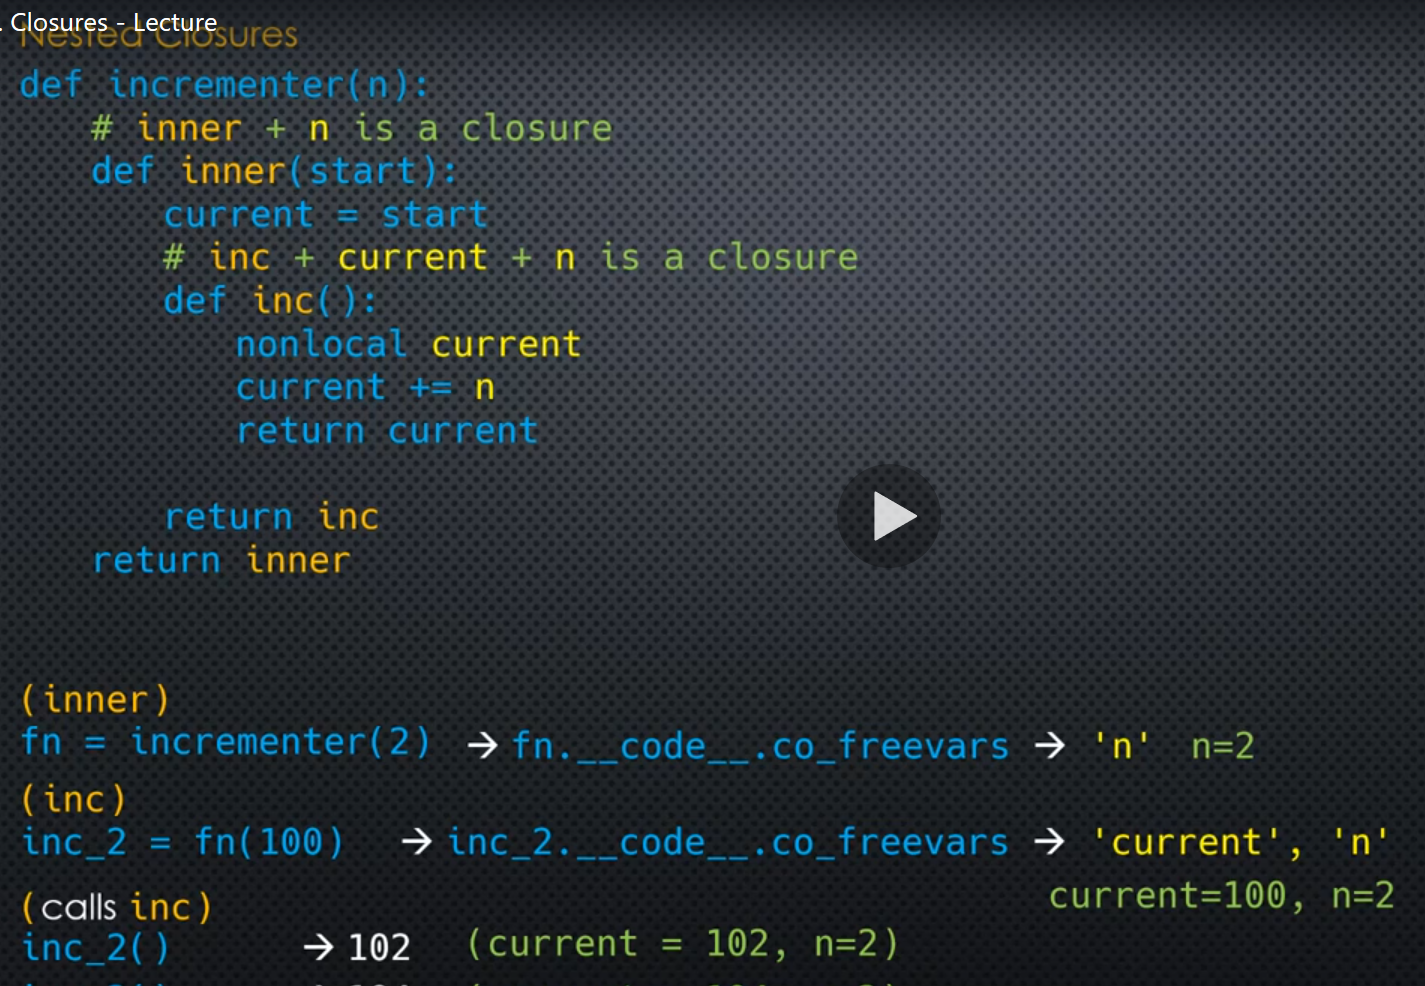

Tohle máme jako nested closure a to už je docela jízda :D. Takže zde musíme už řádně, pouze názorně v codu uvidíme lépe.

In [65]:
def outer():
    x = "python"
    def inner():
        print(x)
    return inner
# jelikož je x nonlocal variable - vytváří mi funkce inner a x closure

In [67]:
fn = outer()

In [70]:
fn.__code__.co_freevars, fn.__closure__

(('x',), (<cell at 0x000001482B90AFD0: str object at 0x0000014829AC2B30>,))

Takže vidíme, že zde máme free var naše x a ještě adresu našeho cell objektu a str objektu.

In [82]:
def outer():
    x = [1,2,3]
    print(hex(id(x)))
    def inner():
        x = [1,2,3]
        print(hex(id(x)))
    return inner

In [85]:
fn = outer(), fn()

0x1482b90d600
0x1482b90d600


Takže vidíme, že máme stále stejnou adresu.

In [88]:
def outer():
    x = [1,2,3]
    print(hex(id(x)))
    def inner():
        y = x
        print(hex(id(y)))
    return inner

In [96]:
fn = outer()

0x1482b84a700


In [98]:
fn()

0x1482b84a700


In [97]:
fn.__closure__

(<cell at 0x000001482B9339A0: list object at 0x000001482B84A700>,)

Obě ukazuje na cell a obě ukazuje na finální objekt.

In [110]:
def outer():
    count = 0#-cell-0
    def inc():
        nonlocal count #-cell-0
        #sdílený count mezi inc a outer
        count += 1
        return count
    return inc

In [111]:
fn = outer()

In [112]:
fn.__code__.co_freevars #jasné

('count',)

In [113]:
fn.__closure__ #cell směřuje na count a ten na náš objekt - v tomto případě 0

(<cell at 0x000001482B933190: int object at 0x00007FF85C0026F0>,)

In [114]:
fn()

1

In [116]:
fn.__closure__ #změnila se memory adresa našeho objektu - protože jsme zvýšili z 0 na 1
#ale adresa cell je stále stejná

(<cell at 0x000001482B933190: int object at 0x00007FF85C002710>,)

In [119]:
def outer():
    count = 0
    
    def inc1():
        nonlocal count
        count += 1
        return count
    
    def inc2():
        nonlocal count
        count += 1
        return count
    return inc1, inc2
#nyní mám 2x county směřující na stejný objekt
#zapakovaný return

In [120]:
fn1, fn2 = outer() #unpack a volání funkce je prostě luxus :)

In [125]:
fn1.__code__.co_freevars, fn2.__code__.co_freevars,

(('count',), ('count',))

In [126]:
fn1.__closure__, fn2.__closure__

((<cell at 0x000001482B933880: int object at 0x00007FF85C0026F0>,),
 (<cell at 0x000001482B933880: int object at 0x00007FF85C0026F0>,))

Takže jde krásně vidět že jelikož count je ovlivněný objema mají stejnou adresu.

In [127]:
fn1()

1

In [128]:
fn1.__closure__, fn2.__closure__

((<cell at 0x000001482B933880: int object at 0x00007FF85C002710>,),
 (<cell at 0x000001482B933880: int object at 0x00007FF85C002710>,))

A též pokud změním fn1() změni se i fn2() protože jsou propojené s count - oni jsou jen bunky směřující na objekt který je měněn jak z fn1 a fn2

In [136]:
def pow(n):
    def inner(x):
        return x **n
    return inner
#PROČ JE ZDE CLOSURE?
#nonlocal variable n je předáváno výše ve funkci

In [131]:
square = pow(2)

In [132]:
square.__closure__

(<cell at 0x000001482B933820: int object at 0x00007FF85C002730>,)

In [135]:
square.__code__.co_freevars

('n',)

Pokud bych vytvořil pow - jiné n mám jiné closure

In [137]:
def adder(n):
    def inner(x):
        return x + n
    return inner

In [138]:
add_1 = adder(1) 
add_2 = adder(2)
add_3 = adder(3)
#efinuje funkce - které se poté zavolají zase s číslem :)
#ale tentokrát s x ..prostě jim napevno přidávám n - ale abych měl output musím spustit
#add1 apod s x

In [141]:
add_1.__closure__, add_2.__closure__, add_3.__closure__
#máme 3 odlišné closure

((<cell at 0x000001482B9333A0: int object at 0x00007FF85C002710>,),
 (<cell at 0x000001482B933910: int object at 0x00007FF85C002730>,),
 (<cell at 0x000001482B933A30: int object at 0x00007FF85C002750>,))

In [143]:
add_1(10), add_2(10), add_3(10)
#zadáme jim tedy x a máme output ..máme krásní 3 rozdílné closure

(11, 12, 13)

Tak a nyní to zkusíme udělat skrze loop.

In [146]:
adders = []
for n in range(1,4):
    #pomocí lambdy uděláme naší inner funkci
    adders.append(lambda x: x + n )
    #naše n se zde mění podle range
    #closure zde nemáme naše n je global

In [145]:
adders

[<function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>]

In [147]:
adders[0].__closure__ #jen ukázka že nemám closer

In [149]:
adders[0](10) #doufal bych že mám první funkci ale nemám

13

Protože naše lambda nemá closure a n se přepisuje, takže si pamatuje pouze poslední n a to je 3..proto máme 13.

In [151]:
adders[0](10), adders[1](10), adders[2](10) #všude stejné

(13, 13, 13)

Nyní to zkusíme napravit a zajistit closure

In [152]:
def create_adders():
    adders = []
    for n in range(1,4):
        adders.append(lambda x: x + n )
    return adders
#jelikžo to máme ve funkci nedostane se mi to z global scopu!
#a tudíž máme closure

In [154]:
adders = create_adders()

In [155]:
adders[0].__closure__

(<cell at 0x000001482B90A0A0: int object at 0x00007FF85C002750>,)

In [156]:
adders[1].__closure__

(<cell at 0x000001482B90A0A0: int object at 0x00007FF85C002750>,)

Máme tedy stejná closure.

In [160]:
adders[0](10), adders[1](10), adders[2](10)

(13, 13, 13)

Takže máme stejný výsledek. Protože všechny naše closures se mění naráz viz jako výše. Proto máme pořád stejný problém, jak jej vyřešit?

In [162]:
def create_adders():
    adders = []
    for n in range(1,4):
        adders.append(lambda x, y=n: x + y )
    return adders

Tak a proč nám tohle funguje? :), protože y není nikde s ničím sdílené a tudíž je pouze v rámci svého scopu a tudíž máme 4x různé y.

In [163]:
adders = create_adders()

In [164]:
adders[0](10), adders[1](10), adders[2](10)

(11, 12, 13)

- adders.append(lambda x: x + n )
- adders.append(lambda x, y=n: x + y )
- A PROČ PROTOŽE y není freevariable a obejdu closure a hlavně naše hodnota není viděná a načte se pythnem až když lambda proběhne

In [165]:
adders[0].__closure__, adders[0].__code__.co_freevars

(None, ())

## Closure Applications

In [168]:
class Averager:
    def __init__(self):
        self.numbers = []
        
    def add(self, number):
        self.numbers.append(number)
        total = sum(self.numbers)
        count = len(self.numbers)
        return total / count
#naše jednoduchá classa co průměruje

In [169]:
a = Averager()

In [170]:
a.add(10)

10.0

In [171]:
a.add(20)

15.0

In [172]:
a.add(30)

20.0

Naše classa funguje jak má, vše je ok. Nyní koukneme jak toto vytvořit pomocí closures.

In [185]:
def averager():
    numbers = []
    def add(number):
        numbers.append(number)
        #nonlocal - takže máme closure
        total = sum(numbers)
        count = len(numbers)
        return total / count
    return add

In [186]:
a = averager()

In [187]:
a.__code__.co_freevars

('numbers',)

In [175]:
a(10)

10.0

In [176]:
a(20)

15.0

In [177]:
a(30)

20.0

Takže máme stejný výsledek pomocí closure. To je prostě pěkné jelikož si sdílí svůj list napříč funkcí tak vše frčí jak má.

In [188]:
def averager():
    total = 0
    count = 0
    def add(number):
        nonlocal total
        nonlocal count
        #potřebuji zajistit aby si udrželi svojí hodnotu
        #mám zde assigment proto jim dodávám nonlocal
        total = total + number
        count = count +1
        return total / count
    return add

In [182]:
a = averager()

In [184]:
a.__code__.co_freevars

('count', 'total')

Máme tedy dvě free vars hodnoty.

In [189]:
class Averager:
    def __init__(self):
        self.total = 0
        self.count = 0
        
    def add(self, number):
        self.total += number
        self.count += 1
        return self.total / self.count
#náš averager pomocí classy podruhé

In [190]:
from time import perf_counter

In [191]:
perf_counter()

79738.3593392

In [192]:
perf_counter()

79748.3825066

Jen náč časovač.

In [193]:
class Timer:
    def __init__(self):
        self.start = perf_counter()
        #v podstatě měřič naší inicializace
        
    def poll(self):
        return perf_counter() - self.start
    #pouze odečet inicializace classy a zavolání metody poll

In [194]:
t1 = Timer() #a ihned vytvoří perf_counter start

In [196]:
t1.poll() #cca 6 sekund rozdíl

12.569548100000247

In [198]:
t1.poll() #a nyní 18 sekund :)

26.439224200003082

Nyní se metodu poll změním na __call__ - jen když zavolám classu

In [205]:
class Timer:
    def __init__(self):
        self.start = perf_counter()
        #v podstatě měřič naší inicializace
        
    def __call__(self):
        return perf_counter() - self.start
    #pouze odečet inicializace classy a zavolání metody poll

In [206]:
t1 = Timer()

In [208]:
t1() #teď stačí jen volat classu a spustím naší funkci

6.01990789998672

Nyní si vytvoříme closure co udělá to samé

In [209]:
def timer():
    start = perf_counter()
    def poll():
        return perf_counter() - start
    return poll

In [211]:
t2 = timer()

In [212]:
t2()

2.1699661999882665

A máme to samé :). Pokračujeme v dalších aplikacích.

In [228]:
def counter(initial_value=0):
    def inc(increment=1):
        nonlocal initial_value
        initial_value += increment
        return initial_value
    return inc
#poměrně jasná funkce
#jelikož mám assigment musím zajistit že máme nonlocal

In [223]:
counter1 = counter()

In [225]:
counter1()

2

In [252]:
def counter(fn):
    cnt = 0
    """funkce pro počítání spuštění funkce"""
    def inner(*args, **kwargs):
        nonlocal cnt
        cnt += 1 #assigment musím dát nonlocal
        print(f"{fn.__name__} that has been called {cnt}")
        return fn(*args, **kwargs)
    return inner
    #v podstatě funkci spišutíme přes counter a díky tomu jí můžeme počítat :)

In [253]:
def add(a,b):
    return a + b

In [254]:
def mult(a,b):
    return a*b

In [255]:
counter_add = counter(add) #stačí mů jen název funkce

In [256]:
counter_add.__closure__

(<cell at 0x000001482B94C250: int object at 0x00007FF85C0026F0>,
 <cell at 0x000001482B94C790: function object at 0x000001482B959280>)

In [257]:
counter_add.__code__.co_freevars

('cnt', 'fn')

Jasné naše funkce je closure s počtem a funkcí. Funkce nemá assigment proto neřeším nonlocal.

In [258]:
counter_add(10,20)

add that has been called 1


30

In [259]:
counter_add(20,30)

add that has been called 2


50

Zde je vlastně důležité, že naše funkce se spouští skrze counter - jinou funkci a ta přijímá *args a **kwargs právě proto aby mohla přijmout jakýkoliv druh funkce - s jakýmikoliv parametry. A jako bonus navíc nám to počítá četnost spuštění.

Vytvoříme si global dictionary, který nám bude naší evidenci udržovat - očetnosti funkcí.

In [260]:
counters = dict()

In [267]:
def counter(fn):
    cnt = 0
    def inner(*args,**kwargs):
        nonlocal cnt
        cnt += 1
        counters[fn.__name__] = cnt
        #vkládáme do dictionary
        #counters si poradí sám 
        return fn(*args, **kwargs)
    return inner
#takto mů§j counter ukládá všechno do dicitonary který je ale global
#takžed můj dictionary trackuje všechny funkce které budou přes něj spuštěny

In [269]:
counted_add = counter(add)
counter_mult = counter(mult)

In [270]:
counted_add(10,20)

30

In [271]:
counted_add(20,40)

60

In [272]:
counters

{'add': 2}

In [274]:
counter_mult(2,5)

10

In [275]:
counters

{'add': 2, 'mult': 1}

Takže to už je docela pěkné.

Ideální by bylo asi vytvářet dictionary ve funkci? Nemusím si tak pamatovat a nic definovat v global.

In [276]:
def counter(fn, counters):
    cnt = 0
    def inner(*args,**kwargs):
        nonlocal cnt
        cnt += 1
        counters[fn.__name__] = cnt
        return fn(*args, **kwargs)
    return inner
#nyní máme counters v parametrech takže přebijeme global
#a znovu neřeším u counters nonlocal protože nemodifikujeme counters
#my modifikujeme jeho obsah

In [277]:
c = dict()

In [278]:
counted_add = counter(add, c)
counted_mult = counter(mult,c)

In [280]:
counted_add(20,10)

30

In [281]:
counted_add(10,15)

25

In [282]:
counted_mult(2,5)

10

In [283]:
counted_mult(3,6)

18

In [285]:
counters #stále stejné ten jsme neměnili

{'add': 2, 'mult': 1}

In [287]:
c #tohle je náš nový

{'add': 2, 'mult': 2}

Na závěr si dáme faktorial

In [288]:
def fact(n):
    product = 1
    for i in range(2, n+1):
        product *= i
    return product

In [289]:
fact(3)

6

## Decorators

Nejdelší úsek nám právě začíná.